<a href="https://colab.research.google.com/github/Bright-Orison/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAME: BRIGHT ALORWOYIE**

---
---
## **TOPIC: CUSTOMER CHURN PREDICTION**
---

---
---

**ABSTRACT**

- Customer churn is a significant issue and one of the most pressing challenges for large businesses. Companies are working to create methods to predict prospective customer churn because it has such a direct impact on their revenues, particularly in the telecom industry. As a result, identifying factors that contribute to customer churn is critical in order to take the required steps to reduce churn. This project's key contribution is the development of a churn prediction model that helps telecom carriers estimate which customers are most likely to churn. The model employs machine learning techniques on a large data platform to create a novel approach to feature engineering and selection.

**BUSINESS PROBLEM**

---
---
The aim of this project is to determine why customers leave a network for another and also develop a novel predictive model based on customer characteristics that will enable to users predict whether a given customer from their pool is likely to churn or not

---
---

**TABLE OF CONTENTS**

---
---

- Business Problem
- Data Understanding
- Getting and loading data
- Data Exploration
- Data Preprocessing
- Modelling
- Model Selection
- Conclusion

##### **Importing Packages for data loading and exploration**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

**DATA UNDERSTANDING**

---
---
The data for this project is a csv file with 7043 rows and 21 columns. For the purpose of testing and validating the model, the dataset will be splitted in the ratio 0.75:0.25. The 75% will be used for training the model whereas the remaining 25% will be used to test the stregth and accuracy of the model

---
---

#### Imporing Data

---

In [ ]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### EXPLORATORY DATA ANALYSIS (EDA)

---

In [ ]:
# Checking the metadata information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.shape

(7043, 21)

It can be observed that the data to be used has 7043 rows and 21 columns. Out of the 21 columns, Total charges has been labelled incorrectly as a categorical variable though its a numerical variable and the Os and 1s of Senior Citizen have also been classified as numerical datatypes. These will be corrected by converting the data type to the correct types

#### Converting TotalCharges to numeric and SeniorCitizen to categorical

In [ ]:
# changing TotalCharges to numeric data type

data['TotalCharges'] = pd.to_numeric(data.TotalCharges , errors='coerce')

data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
# converting SeniorCitizen to categorical data type

data['SeniorCitizen'] = data['SeniorCitizen'].replace({1:'Yes',0:'No'})

data['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

The CustomerID is not very relevant for our modeling so it will be dropped

In [ ]:
# dropping customerID column
data = data.drop(columns=['customerID'], axis=1)

##### Checking for null values

In [ ]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data.isnull().sum()/len(data)*100

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

After converting Total charges to numerical variable, it can be observed that TotalCaharges has 11 missing values which is equivalent to 0.156%. 

However, this could also imply that as at the time of data collection, those customers were not charged because they might be new to the platform. To be sure of this speculation, I will dive deeper to look at the feature **tenure** which indicates how long the client has been using the service and compare the indexes with the total charges and conclude on my assertion.

In [ ]:
data['tenure'].isin([0]).sum()

11

It can be observed that **tenure** also has 11 **0s** as **total charges**. Hence let's dive deeper by comparing their indexes to affirm whether the customers are new or not

In [ ]:
print(data[data['tenure'].isin([0])].index)
print(data[data['TotalCharges'].isnull()].index)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


We can conclude that the **11** missing values for total charges are for new customers who have not been charged by the telco company at the time of the data collection and hence I will fill their missing values with **zero(0)**

In [ ]:
# filling the missing values with zeros(0)
data.loc[:,'TotalCharges'] = data.loc[:,'TotalCharges'].replace(np.nan,0)
data['TotalCharges'].isnull().sum()

0

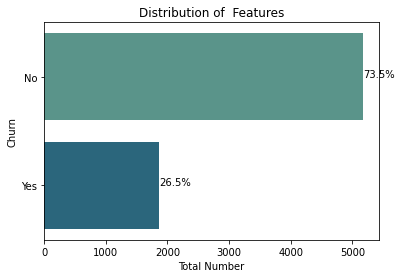

In [ ]:
def count_plot(data,column):    
    ax = sns.countplot(y=column, data=data, palette="crest")
    plt.title('Distribution of  Features')
    plt.xlabel('Total Number')

    total = len(data[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    plt.show()
count_plot(data, "Churn")



## **EXPLORING THE CATEGORICAL FEATURES**

---



This section explores the unique values of each categorical variable in the data, gives a summary statistics of the features, draws a boxplot and a histogram to illustrate the distribution of the variables

In [ ]:
def explore_num(data,x):
    '''
    Exploring the descriptive statistics of the categorical variables 
    and ploting boxplots to check for outliers 
    and histograms to check for their distribution
    '''
    print('Summary Statistics \n')
    print(data[x].apply([len,max,min,np.mean,np.median,]))
    print('='*30)
    print('='*30)
    plt.figure(figsize = (10,5))
    
    #plotting a box plot to depict median, outliers, etc
    meanpointprops = dict(marker='D', markeredgecolor='black',markerfacecolor='c')
    medianprops = dict(linestyle='-.', linewidth=5, color ='yellow')
    plt.subplot(1,2,1, facecolor='grey')
    plt.boxplot(data[x],vert=True,patch_artist=True,notch=True, showmeans=True,\
              meanprops=meanpointprops,medianprops=medianprops,)
              
    plt.xlabel(data[x].name)
    plt.title('Boxplot for {}'.format(data[x].name))
    plt.show
    
    plt.subplot(1,2,2, facecolor='grey')
    plt.hist(data[x])
    plt.title('Histogram')
    plt.tight_layout()
    plt.show

Summary Statistics 

len       7043.000000
max         72.000000
min          0.000000
mean        32.371149
median      29.000000
Name: tenure, dtype: float64


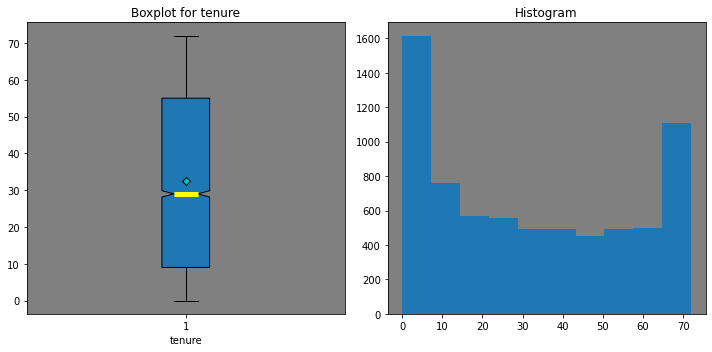

In [ ]:
explore_num(data, 'tenure')

Summary Statistics 

len       7043.000000
max        118.750000
min         18.250000
mean        64.761692
median      70.350000
Name: MonthlyCharges, dtype: float64


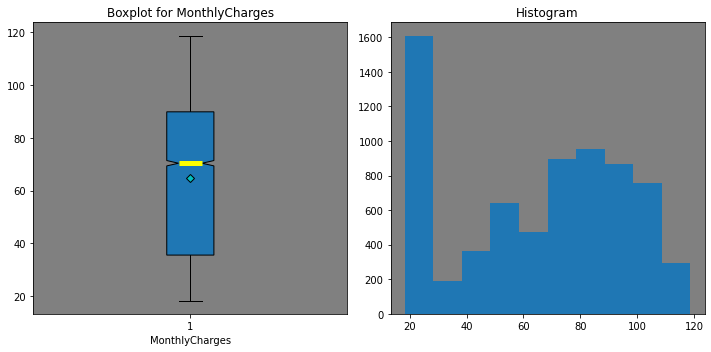

In [ ]:
explore_num(data, 'MonthlyCharges')

Summary Statistics 

len       7043.000000
max       8684.800000
min          0.000000
mean      2279.734304
median    1394.550000
Name: TotalCharges, dtype: float64


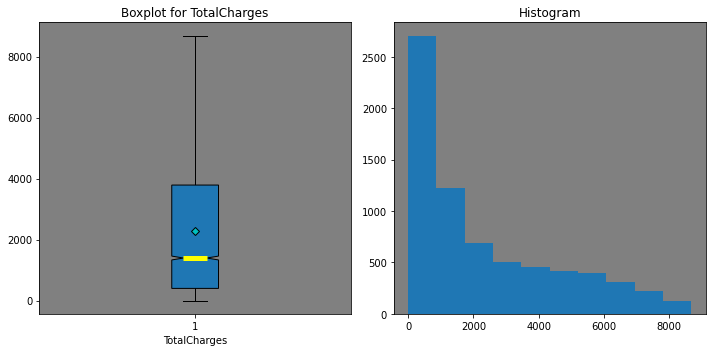

In [ ]:
explore_num(data, 'TotalCharges')

#### Exploring Categorical Variables

In [ ]:
data_col = data.columns
def explore_cat_data(data, var_name):
    """
Explore each categorical variable

Return:
value counts of each of the categorical variable
    """    
    if data[var_name].dtype ==  'object':
        print(data[var_name].value_counts())

for featureName in data_col:
    if data[featureName].dtype == 'object':
        print('')
        print('\n"' + str(featureName))
        print('===============')
        print('Unique Values')  
        print('===============')
        print(data[featureName].nunique())
        print('Value Count')
        print('===============')
        explore_cat_data(data, str(featureName))



"gender
Unique Values
2
Value Count
Male      3555
Female    3488
Name: gender, dtype: int64


"SeniorCitizen
Unique Values
2
Value Count
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64


"Partner
Unique Values
2
Value Count
No     3641
Yes    3402
Name: Partner, dtype: int64


"Dependents
Unique Values
2
Value Count
No     4933
Yes    2110
Name: Dependents, dtype: int64


"PhoneService
Unique Values
2
Value Count
Yes    6361
No      682
Name: PhoneService, dtype: int64


"MultipleLines
Unique Values
3
Value Count
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


"InternetService
Unique Values
3
Value Count
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


"OnlineSecurity
Unique Values
3
Value Count
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


"OnlineBackup
Unique Values
3
Value Count
No     

CATEGORIZING DATA BASED ON UNIQUE FEATURES

From a closer observation of the features, it will be prudent to group the data into three categories as we find their distribution across the target variable.

The data that describes the demography of the customers will be grouped under **demographic features**, those that relate to the services provided by the telco will be under **service quality features** and finally **information on billing features** will be considered.

In [ ]:
demo_attributes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

serv_qual = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup'
                , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

categorical_billing_info = ['Contract', 'PaperlessBilling', 'PaymentMethod']

numerical_billing_info = ['tenure', 'MonthlyCharges', 'TotalCharges']

# **PLOTTING DEMOGRAPHIC FEATURES**

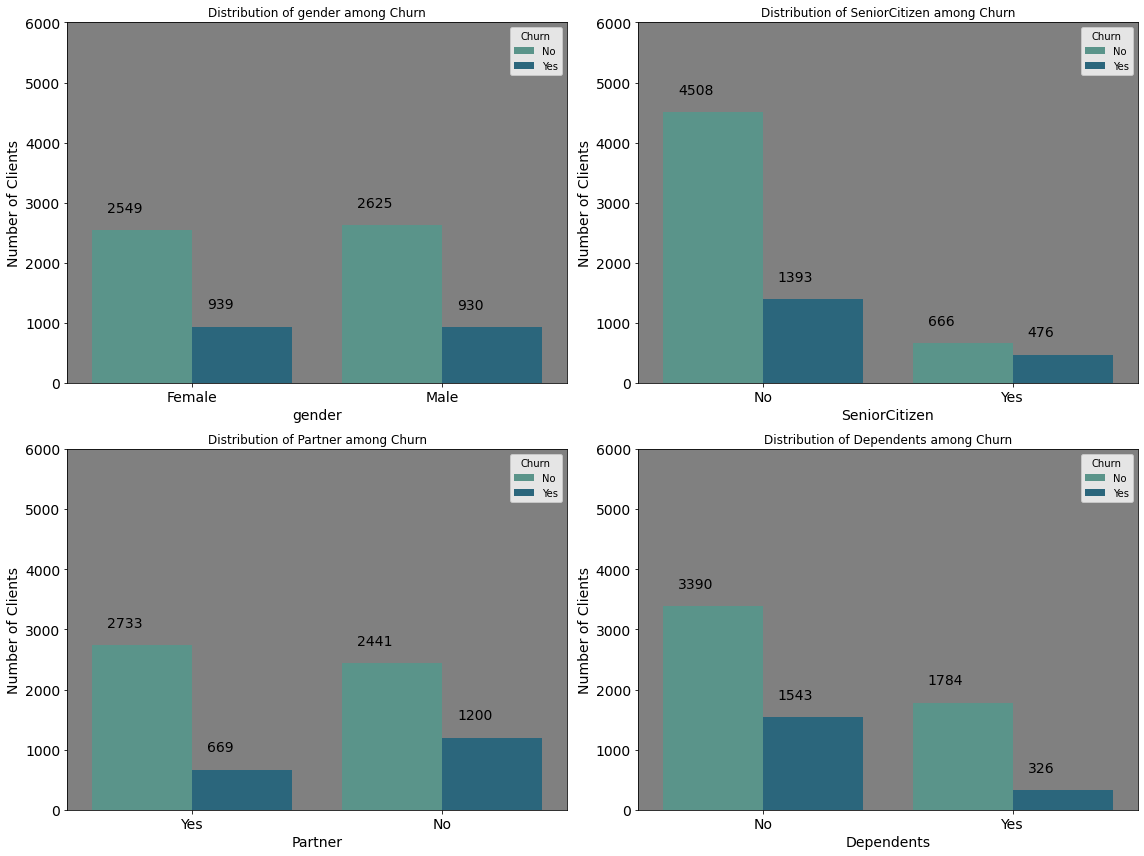

In [ ]:
plt.figure(figsize=(16,12))

for feature,col in enumerate(demo_attributes):    
    plt.subplot(2,2,feature + 1,  facecolor='grey')
    
    ax = sns.countplot(data=data, hue='Churn', x = col, palette = 'crest')

    plt.title('Distribution of {} among Churn'.format(col))
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Clients", fontsize= 14)
    plt.ylim(0,6000)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)
   


    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.06, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

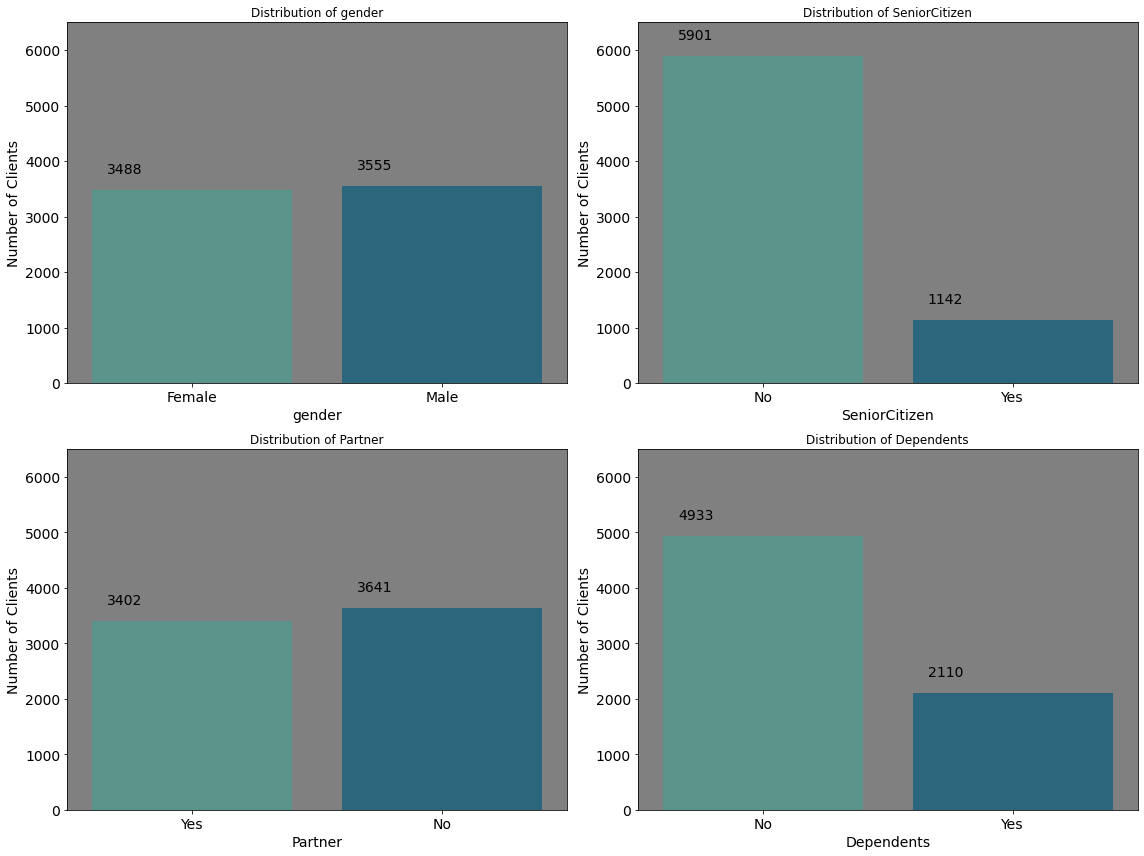

In [ ]:
plt.figure(figsize=(16,12))

for feature,col in enumerate(demo_attributes):    
    plt.subplot(2,2,feature + 1,  facecolor='grey')
    
    ax = sns.countplot(data=data, x = col, palette = 'crest')

    plt.title('Distribution of {}'.format(col))
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Clients", fontsize= 14)
    plt.ylim(0,6500)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)
   


    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.06, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

## **OBSERVATIONS**
___
The following observations were made after exploring the demographic attributes of the customers
- Gender of customers was fairly distributed among men and women. However, about 73.46% of both males and females are loyal whereas 26.34% have churned.
- About 476 out of the 1142, representing 41.68% of the customers who are SeniorCitizens citizens have churned.
- Customers without partners are churning more than those with partners
-Coincidentally, customers without dependents are also more like to churn than those with dependents




## **EXPLORING SERVICE QUALITY FEATURES**

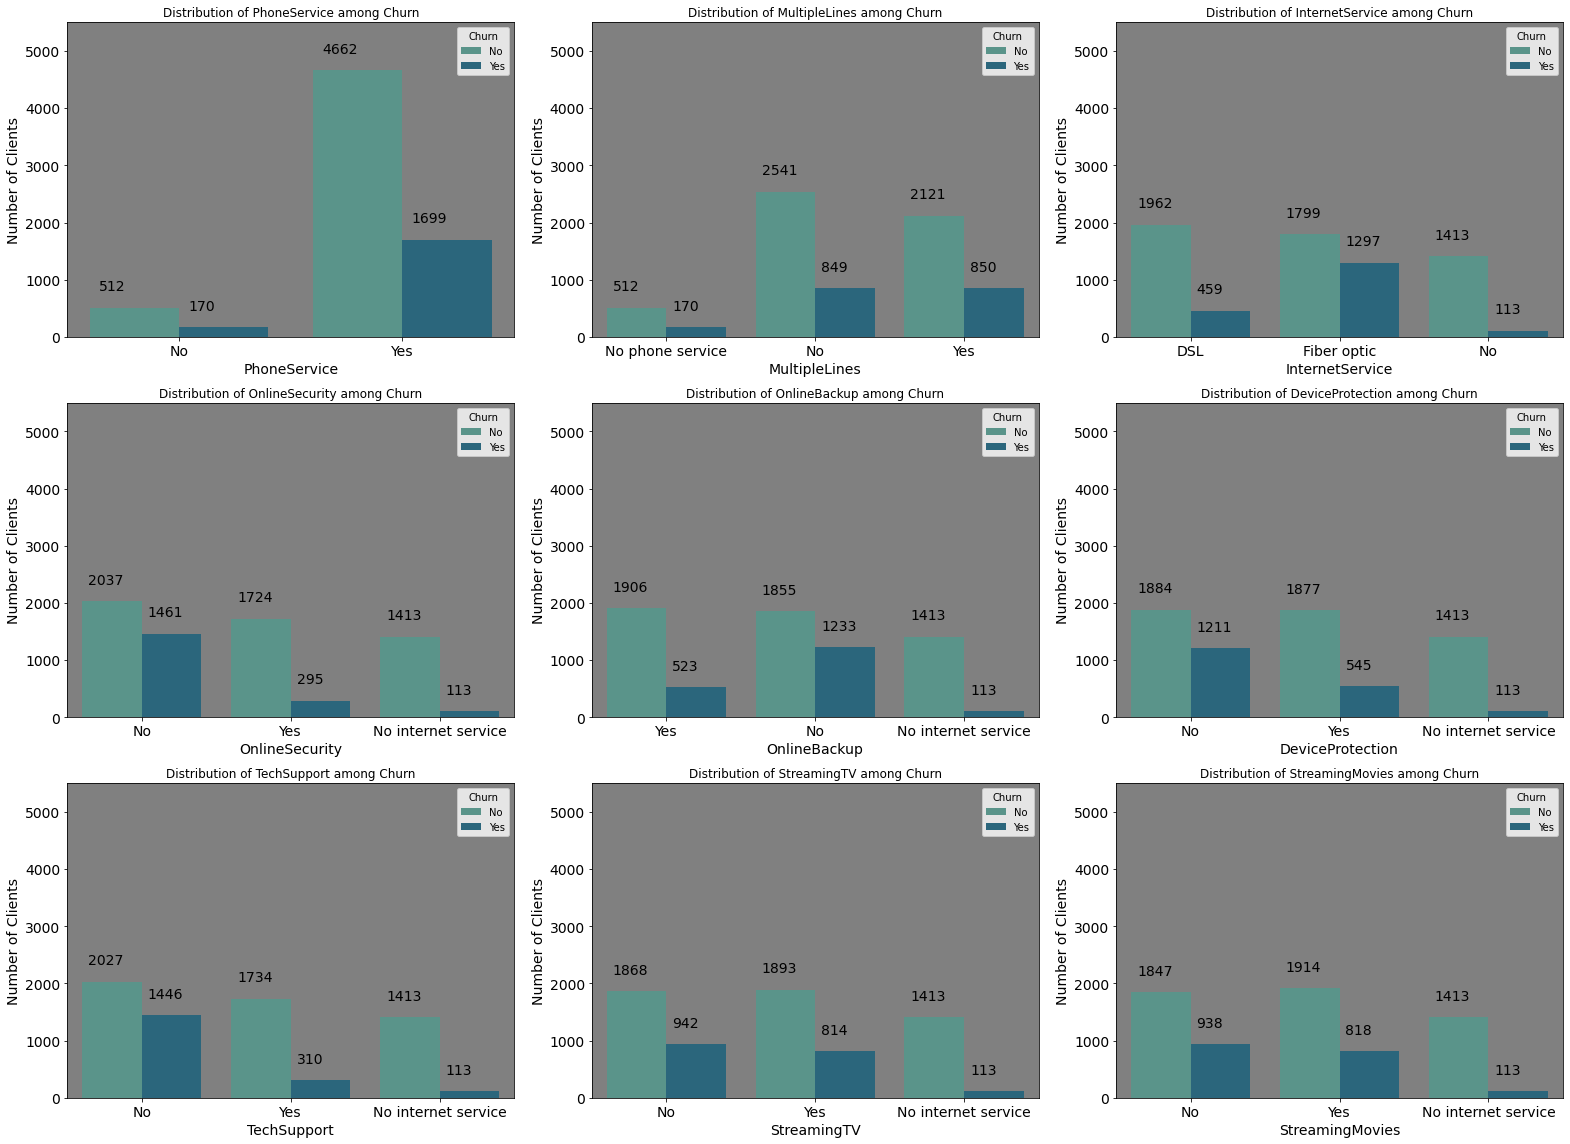

In [ ]:
plt.figure(figsize=(22,16))

for feature,col in enumerate(serv_qual):    
    plt.subplot(3,3,feature + 1,  facecolor='grey')
    
    ax = sns.countplot(data=data, hue='Churn', x = col, palette = 'crest')

    plt.title('Distribution of {} among Churn'.format(col))
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Clients", fontsize= 14)
    plt.ylim(0,5500)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)
   


    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

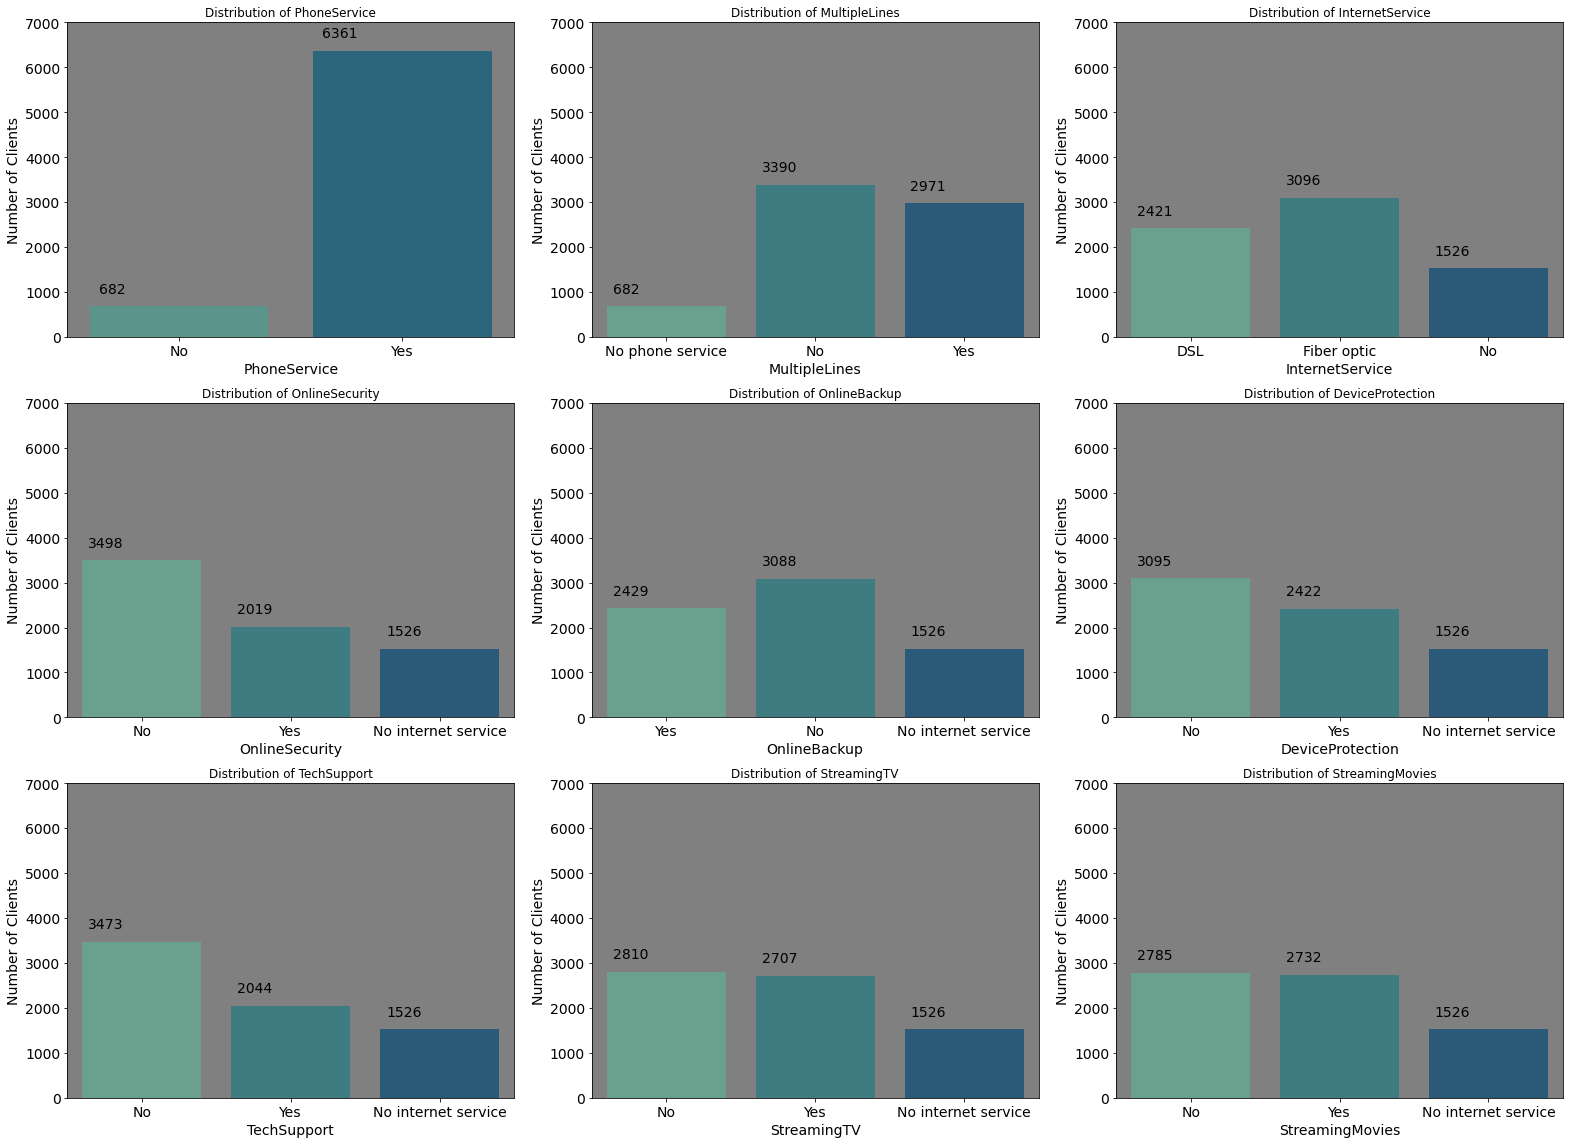

In [ ]:
plt.figure(figsize=(22,16))

for feature,col in enumerate(serv_qual):    
    plt.subplot(3,3,feature + 1,  facecolor='grey')
    
    ax = sns.countplot(data=data, x = col, palette = 'crest')

    plt.title('Distribution of {}'.format(col))
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Clients", fontsize= 14)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)
   


    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

## **OBSERVATIONS**

---
- Customers with phone service are more likely to churn than those without
- Customers with multiple lines churn more likely than those without
- About 41.89% of customers who use Fibre optic are likely to churn
- Customers with no online security are most likely to churn than those with online security.
- Consequently, customers without online backup are more likely to churn. The rate of churn for customers without online backup is 39.93%
- Customers without device protection churm most likely relative to those with device protection. This is similar to Tech support am=nd Streaming TV and Movies
- ***In conclusion, low service quality results in a high rate of churn for customers***

**EXPLORING CUSTOMER BILLING INFORMATION FEATURES AND THEIR RELATION TO CHURN**

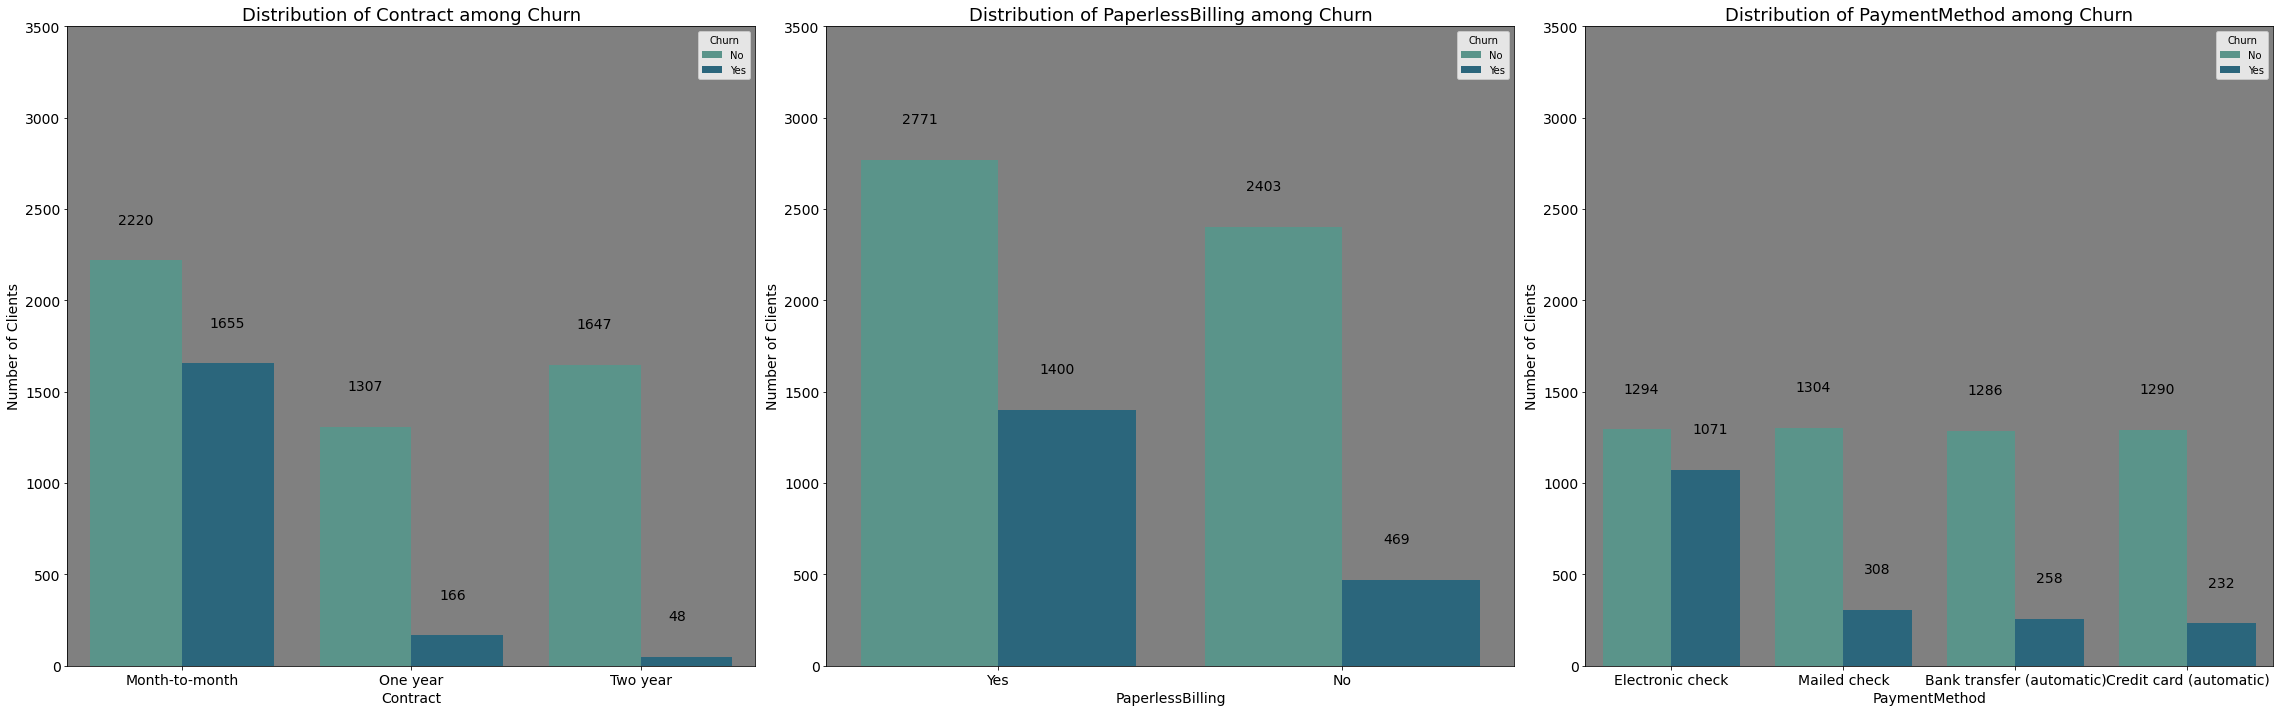

In [ ]:
plt.figure(figsize=(32,10))

for feature,col in enumerate(categorical_billing_info):    
    plt.subplot(1,3,feature + 1,  facecolor='grey')
    
    ax = sns.countplot(data=data, hue='Churn', x = col, palette = 'crest')

    plt.title('Distribution of {} among Churn'.format(col), fontsize= 18)
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Clients", fontsize= 14)
    plt.ylim(0,3500)
    plt.xticks(fontsize= 14)
    #ax.set_xticklabels(xticks, rotation=25)
    plt.yticks(fontsize= 14)
   


    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+200), fontsize= 14)

plt.tight_layout()

plt.show()

In [ ]:
!pip install bioinfokit

In [ ]:
from bioinfokit.analys import stat

#Creating a function to test for relationship

def test_relation(df,x,y):
    tab = pd.crosstab(df[x],df[y])
    test = stat()
    test.chisq(df=tab)
    
    
    print(f'Null hypothesis: {x} and {y} are independent')
    print(f'Alternate hypothesis: {x} and {y} are dependent')
    print('Test results')
    print('-----------------------------------------------------')
    print('Observed frequency values \n')
    print(tab)
    
          
    print('-----------------------------------------------------')
    print(test.expected_df)
    print('-----------------------------------------------------')
    print(test.summary)

In [ ]:
test_relation(data, 'Churn', 'gender')

Null hypothesis: Churn and gender are independent
Alternate hypothesis: Churn and gender are dependent
Test results
-----------------------------------------------------
Observed frequency values 

gender  Female  Male
Churn               
No        2549  2625
Yes        939   930
-----------------------------------------------------

Expected frequency counts

      Female     Male
--  --------  -------
 0   2562.39  2611.61
 1    925.61   943.39

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.484083   0.486579
Log-likelihood     1      0.484068   0.486586



From the chi-square, it can be observed that our p-value of 0.486579 is greater than the alpha = 0.05, hence we conclude that there is not enough reason to reject the null hypothesis. hence we conclude that there is no relationsip between churn and gender. Therefore gender willbe dropped

In [ ]:
test_relation(data, 'Churn', 'SeniorCitizen')

Null hypothesis: Churn and SeniorCitizen are independent
Alternate hypothesis: Churn and SeniorCitizen are dependent
Test results
-----------------------------------------------------
Observed frequency values 

SeniorCitizen    No  Yes
Churn                   
No             4508  666
Yes            1393  476
-----------------------------------------------------

Expected frequency counts

         No      Yes
--  -------  -------
 0  4335.05  838.948
 1  1565.95  303.052

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       159.426  1.51007e-36
Log-likelihood     1       148.154  4.39013e-34



From the chi-square, it can be observed that the p-value of 1.51007e-36 is less than the alpha of 0.05, hence we conclude that there enough reason to reject the null hypothesis. Hence we conclude that there is a relationsip between churn and SenioeCitizen. Therefore SeniorCitizen will be useful in the model

In [ ]:
test_relation(data, 'Churn', 'Partner')

Null hypothesis: Churn and Partner are independent
Alternate hypothesis: Churn and Partner are dependent
Test results
-----------------------------------------------------
Observed frequency values 

Partner    No   Yes
Churn              
No       2441  2733
Yes      1200   669
-----------------------------------------------------

Expected frequency counts

          No       Yes
--  --------  --------
 0  2674.79   2499.21
 1   966.212   902.788

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       158.733  2.13991e-36
Log-likelihood     1       160.64   8.20128e-37



From the chi-square, it can be observed that the p-value of 2.13991e-36 is less than the alpha of 0.05, hence we conclude that there enough reason to reject the null hypothesis. Hence we conclude that there is a relationsip between churn and Partner. Therefore Partner will be useful in the model

In [ ]:
test_relation(data, 'Churn', 'Dependents')

Null hypothesis: Churn and Dependents are independent
Alternate hypothesis: Churn and Dependents are dependent
Test results
-----------------------------------------------------
Observed frequency values 

Dependents    No   Yes
Churn                 
No          3390  1784
Yes         1543   326
-----------------------------------------------------

Expected frequency counts

         No      Yes
--  -------  -------
 0  3623.93  1550.07
 1  1309.07   559.93

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       189.129  4.92492e-43
Log-likelihood     1       202.874  4.92722e-46



From the chi-square, it can be observed that the p-value of 4.92492e-43 is less than the alpha of 0.05, hence we conclude that there enough reason to reject the null hypothesis. Hence we conclude that there is a relationsip between churn and Dependents. Therefore Dependents will be useful in the model

In [ ]:
test_relation(data, 'Churn', 'PhoneService')

Null hypothesis: Churn and PhoneService are independent
Alternate hypothesis: Churn and PhoneService are dependent
Test results
-----------------------------------------------------
Observed frequency values 

PhoneService   No   Yes
Churn                  
No            512  4662
Yes           170  1699
-----------------------------------------------------

Expected frequency counts

         No      Yes
--  -------  -------
 0  501.018  4672.98
 1  180.982  1688.02

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1      0.915033   0.338783
Log-likelihood     1      0.925475   0.336041



From the chi-square, it can be observed that our p-value of 0.338783 is greater than the alpha = 0.05, hence we conclude that there is not enough reason to reject the null hypothesis. Hence we conclude that there is no relationsip between churn and PhoneService. Therefore PhoneService will not be relevant for the model

In [ ]:
test_relation(data, 'Churn', 'MultipleLines')

Null hypothesis: Churn and MultipleLines are independent
Alternate hypothesis: Churn and MultipleLines are dependent
Test results
-----------------------------------------------------
Observed frequency values 

MultipleLines    No  No phone service   Yes
Churn                                      
No             2541               512  2121
Yes             849               170   850
-----------------------------------------------------

Expected frequency counts

          No    No phone service       Yes
--  --------  ------------------  --------
 0  2490.4               501.018  2182.59
 1   899.604             180.982   788.414

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square     P-value
--------------  ----  ------------  ----------
Pearson            2       11.3304  0.00346438
Log-likelihood     2       11.2866  0.00354111



From the chi-square, it can be observed that the p-value of 0.00346438 is less than the alpha of 0.05, hence we conclude that there enough reason to reject the null hypothesis. Hence we conclude that there is a relationsip between churn and MultipleLines. Therefore it will be useful in the model

In [ ]:
test_relation(data, 'Churn', 'InternetService')

Null hypothesis: Churn and InternetService are independent
Alternate hypothesis: Churn and InternetService are dependent
Test results
-----------------------------------------------------
Observed frequency values 

InternetService   DSL  Fiber optic    No
Churn                                   
No               1962         1799  1413
Yes               459         1297   113
-----------------------------------------------------

Expected frequency counts

        DSL    Fiber optic        No
--  -------  -------------  --------
 0  1778.54       2274.41   1121.05
 1   642.46        821.585   404.954

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       732.31   9.57179e-160
Log-likelihood     2       782.818  1.03095e-170



From the chi-square, it can be observed that the p-value of 9.57179e-160 is less than the alpha of 0.05, hence we conclude that there enough reason to reject the null hypothesis. Hence we conclude that there is a relationsip between churn and PhoneService. Therefore it will be useful in the model

In [ ]:
test_relation(data, 'Churn', 'OnlineSecurity')

Null hypothesis: Churn and OnlineSecurity are independent
Alternate hypothesis: Churn and OnlineSecurity are dependent
Test results
-----------------------------------------------------
Observed frequency values 

OnlineSecurity    No  No internet service   Yes
Churn                                          
No              2037                 1413  1724
Yes             1461                  113   295
-----------------------------------------------------

Expected frequency counts

          No    No internet service       Yes
--  --------  ---------------------  --------
 0  2569.74                1121.05   1483.22
 1   928.264                404.954   535.782

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       849.999  2.66115e-185
Log-likelihood     2       911.044  1.47661e-198



From the chi-square, it can be observed that the p-value of 2.66115e-185 is less than the alpha of 0.05, hence we conclude that there enough reason to reject the null hypothesis. Hence we conclude that there is a relationsip between churn and OnlineSecurity. Therefore it will be useful in the model

In [ ]:
test_relation(data, 'Churn', 'OnlineBackup')

Null hypothesis: Churn and OnlineBackup are independent
Alternate hypothesis: Churn and OnlineBackup are dependent
Test results
-----------------------------------------------------
Observed frequency values 

OnlineBackup    No  No internet service   Yes
Churn                                        
No            1855                 1413  1906
Yes           1233                  113   523
-----------------------------------------------------

Expected frequency counts

          No    No internet service       Yes
--  --------  ---------------------  --------
 0  2268.54                1121.05   1784.42
 1   819.462                404.954   644.583

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       601.813  2.07976e-131
Log-likelihood     2       659.117  7.49267e-144



From the chi-square, it can be observed that the p-value of 2.07976e-131 is less than the alpha of 0.05, hence we conclude that there enough reason to reject the null hypothesis. Hence we conclude that there is a relationsip between churn and OnlineBackup. Therefore it will be useful in the model

In [ ]:
test_relation(data, 'Churn', 'DeviceProtection')

Null hypothesis: Churn and DeviceProtection are independent
Alternate hypothesis: Churn and DeviceProtection are dependent
Test results
-----------------------------------------------------
Observed frequency values 

DeviceProtection    No  No internet service   Yes
Churn                                            
No                1884                 1413  1877
Yes               1211                  113   545
-----------------------------------------------------

Expected frequency counts

         No    No internet service       Yes
--  -------  ---------------------  --------
 0  2273.68               1121.05   1779.27
 1   821.32                404.954   642.726

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       558.419  5.50522e-122
Log-likelihood     2       618.614  4.67484e-135



From the chi-square, it can be observed that the p-value of 5.50522e-122 is less than the alpha of 0.05, hence we conclude that there enough reason to reject the null hypothesis. Hence we conclude that there is a relationsip between churn and DeviceProtection. Therefore it will be useful in the model

In [ ]:
test_relation(data, 'Churn', 'TechSupport')

Null hypothesis: Churn and TechSupport are independent
Alternate hypothesis: Churn and TechSupport are dependent
Test results
-----------------------------------------------------
Observed frequency values 

TechSupport    No  No internet service   Yes
Churn                                       
No           2027                 1413  1734
Yes          1446                  113   310
-----------------------------------------------------

Expected frequency counts

         No    No internet service       Yes
--  -------  ---------------------  --------
 0  2551.37               1121.05   1501.58
 1   921.63                404.954   542.416

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       828.197  1.44308e-180
Log-likelihood     2       887.714  1.71904e-193



From the chi-square, it can be observed that the p-value of 1.44308e-180 is less than the alpha of 0.05, hence we conclude that there enough reason to reject the null hypothesis. Hence we conclude that there is a relationsip between churn and TechSupport. Therefore it will be useful in the model

In [ ]:
test_relation(data, 'Churn', 'StreamingTV')

Null hypothesis: Churn and StreamingTV are independent
Alternate hypothesis: Churn and StreamingTV are dependent
Test results
-----------------------------------------------------
Observed frequency values 

StreamingTV    No  No internet service   Yes
Churn                                       
No           1868                 1413  1893
Yes           942                  113   814
-----------------------------------------------------

Expected frequency counts

          No    No internet service       Yes
--  --------  ---------------------  --------
 0  2064.31                1121.05   1988.64
 1   745.689                404.954   718.356

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       374.204  5.52899e-82
Log-likelihood     2       449.456  2.52305e-98



From the chi-square, it can be observed that the p-value of 5.52899e-82 is less than the alpha of 0.05, hence we conclude that there enough reason to reject the null hypothesis. Hence we conclude that there is a relationsip between churn and StreamingTV. Therefore it will be useful in the model

In [ ]:
test_relation(data, 'Churn', 'Contract')

Null hypothesis: Churn and Contract are independent
Alternate hypothesis: Churn and Contract are dependent
Test results
-----------------------------------------------------
Observed frequency values 

Contract  Month-to-month  One year  Two year
Churn                                       
No                  2220      1307      1647
Yes                 1655       166        48
-----------------------------------------------------

Expected frequency counts

      Month-to-month    One year    Two year
--  ----------------  ----------  ----------
 0           2846.69     1082.11    1245.2
 1           1028.31      390.89     449.802

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson            2       1184.6   5.86304e-258
Log-likelihood     2       1386.81  7.2127e-302



From the chi-square, it can be observed that the p-value of 5.86304e-258 is less than the alpha of 0.05, hence we conclude that there enough reason to reject the null hypothesis. Hence we conclude that there is a relationsip between churn and Contract. Therefore it will be useful in the model

In [ ]:
test_relation(data, 'Churn', 'PaperlessBilling')

Null hypothesis: Churn and PaperlessBilling are independent
Alternate hypothesis: Churn and PaperlessBilling are dependent
Test results
-----------------------------------------------------
Observed frequency values 

PaperlessBilling    No   Yes
Churn                       
No                2403  2771
Yes                469  1400
-----------------------------------------------------

Expected frequency counts

          No      Yes
--  --------  -------
 0  2109.86   3064.14
 1   762.142  1106.86

-----------------------------------------------------

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       258.278  4.07335e-58
Log-likelihood     1       269.422  1.51657e-60



From the chi-square, it can be observed that the p-value of 4.07335e-58 is less than the alpha of 0.05, hence we conclude that there enough reason to reject the null hypothesis. Hence we conclude that there is a relationsip between churn and PaperlessBilling. Therefore it will be useful in the model

In [ ]:
test_relation(data, 'Churn', 'PaymentMethod')

Null hypothesis: Churn and PaymentMethod are independent
Alternate hypothesis: Churn and PaymentMethod are dependent
Test results
-----------------------------------------------------
Observed frequency values 

PaymentMethod  Bank transfer (automatic)  ...  Mailed check
Churn                                     ...              
No                                  1286  ...          1304
Yes                                  258  ...           308

[2 rows x 4 columns]
-----------------------------------------------------

Expected frequency counts

      Bank transfer (automatic)    Credit card (automatic)    Electronic check    Mailed check
--  ---------------------------  -------------------------  ------------------  --------------
 0                     1134.27                    1118.11               1737.4        1184.22
 1                      409.731                    403.893               627.6         427.776

-----------------------------------------------------

Chi-squar

From the chi-square, it can be observed that the p-value of 3.68235e-140 is less than the alpha of 0.05, hence we conclude that there enough reason to reject the null hypothesis. Hence we conclude that there is a relationsip between churn and PaymentMethod. Therefore it will be useful in the model

The p-value measures the probability of getting a more extreme value than the one you got from the experiment. If the p-value is greater than alpha, you fail to reject the null hypothesis. If it is less than alpha, you reject the null hypothesis.


From the chi-test, the p-values of gender and phone service are greater than the apha of 0.05, hence I fail to reject the null hypothesis claims. These two variables will thus be taken out from the model




**TESTING THE CORRELATION BETWEEN THE VARIABLES**

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


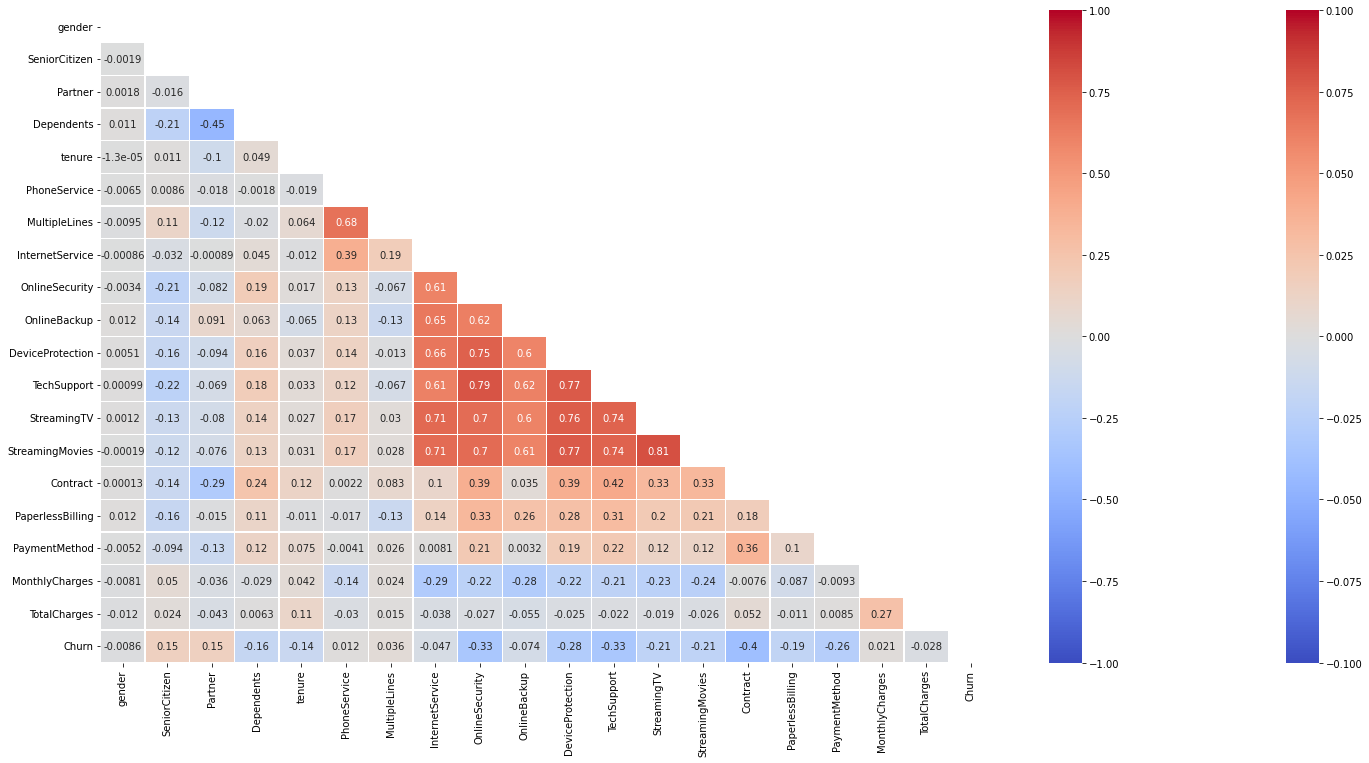

In [ ]:
plt.figure(figsize=(25,12))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr,annot=corr,cmap='coolwarm',fmt='.2g',mask=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


From the correlation matrix, StreamingMovies is highly correlated  with StreamingTv, StreamingMovies and DeviceProtection, InternetService, OnlineSecurity. Likewise, StreamingTv  is also highly correlated with InternetService, OnlineSecurity, DeviceProtection and TechSupport.
Again, TechSupport is also highly correlated with OnlineSecurity and DeviceProtection. 

***To avoid the problem of multicollinearity, StreamingTv, StreamingMovies and TechSupport will be dropped.***

## DATA PREPROCESSING

Dropping Irrelevant variables

In [ ]:
data = data.drop(columns=['DeviceProtection','gender','PhoneService','StreamingTV',\
                          'StreamingMovies', 'TechSupport' ], axis = 1)

In [ ]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,No phone service,DSL,No,Yes,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,No,DSL,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,No,DSL,Yes,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,No phone service,DSL,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 14)

**MERGING REDUNDANT COLUMNS**

---
To avoid redundancy and dimensionality, some columns that have similar sense of information will be merged 

In [ ]:
data = data.replace(to_replace={
             'MultipleLines':{'No phone service':'No'}, 
             'OnlineSecurity':{'No internet service':'No'},
             'OnlineBackup':{'No internet service':'No'},
             'Contract':{'One year':'One Year and Above', 
                         'Two year':'One Year and Above'},
             'PaymentMethod':{'Electronic check':'Check',
                              'Mailed check':'Check',
                              'Bank transfer (automatic)':'Automatic Transfer',
                              'Credit card (automatic)':'Automatic Transfer'}
             })


In [ ]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,No,DSL,No,Yes,Month-to-month,Yes,Check,29.85,29.85,No
1,No,No,No,34,No,DSL,Yes,No,One Year and Above,No,Check,56.95,1889.50,No
2,No,No,No,2,No,DSL,Yes,Yes,Month-to-month,Yes,Check,53.85,108.15,Yes
3,No,No,No,45,No,DSL,Yes,No,One Year and Above,No,Automatic Transfer,42.30,1840.75,No
4,No,No,No,2,No,Fiber optic,No,No,Month-to-month,Yes,Check,70.70,151.65,Yes


**SPLITTING THE DATA INTO TARGET AND PREDICTORS**

---
---

In [ ]:
y = data['Churn']
X = data.drop('Churn', axis=1)

**ENCODING THE CATEGORICAL VARIABLES**

---
One hot encoding is a method of converting data to prepare it for an modeling and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to the columns. Each integer value is represented as a binary vector

---


In [ ]:
# Encoding the predictors
X = pd.get_dummies(X, columns=['SeniorCitizen', 
                                  'Partner',
                                  'Dependents',
                                  'MultipleLines',
                                  'InternetService', 
                                  'OnlineSecurity',
                                  'OnlineBackup',
                                  'Contract',
                                  'PaperlessBilling',
                                  'PaymentMethod',
                                  ], drop_first=True)

In [ ]:
# Encoding the target variable
y= pd.get_dummies(y,drop_first=True)

**BALANCINCING THE MODEL USING SMOTE TECHNIQUE**

---
---


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

Yes
1      5174
0      5174
dtype: int64

In [ ]:
y=y.values
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=uint8)

In [ ]:
X=X.values
X

array([[1.0000e+00, 2.9850e+01, 2.9850e+01, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [3.4000e+01, 5.6950e+01, 1.8895e+03, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+00, 5.3850e+01, 1.0815e+02, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       ...,
       [1.1000e+01, 2.9600e+01, 3.4645e+02, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [4.0000e+00, 7.4400e+01, 3.0660e+02, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [6.6000e+01, 1.0565e+02, 6.8445e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state=10)

## **BUILDING MODELS**

---
---
- Decision Tree Classifier
- Support Vector Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Adaboost Classifier
- Logistic Regression

---
---

**Decision Tree Classifier Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [ ]:
# Instantiating Model
tree = DecisionTreeClassifier(random_state=0)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10,12],'max_leaf_nodes':[2,3,4,5,6,8]}
grid_tree = GridSearchCV(tree, param_grid = param_grid, cv=10)
grid_tree.fit(X_train,y_train)
print('Best cross validation accuracy: {:.2f}'.format(grid_tree.best_score_))
print('Best parameters:', grid_tree.best_params_)

print('')
print('Best train score:{:.2f}'.format(grid_tree.score(X_train, y_train)))
print('Best test score: {:.2f}'.format(grid_tree.score(X_test,y_test)))

Best cross validation accuracy: 0.80
Best parameters: {'max_features': 7, 'max_leaf_nodes': 8}

Best train score:0.80
Best test score: 0.80


**Confusion Matrix of the Decision Tree**

In [ ]:
tree_pred = grid_tree.predict(X_test)
print(confusion_matrix(y_test,tree_pred))
print(classification_report(y_test,tree_pred))

[[1021  297]
 [ 217 1052]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1318
           1       0.78      0.83      0.80      1269

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587



**Support Vector Classifier**

---
---
Importing Relevant Packages

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipe = Pipeline([('Scaler', StandardScaler()),('SVC',SVC())])
param_grid = {'SVC__C': [0.01, 0.1, 1, 10, 100],
             'SVC__gamma':[0.001,.01,0.1,1,10,100]}
grid_sup = GridSearchCV(pipe, param_grid = param_grid, cv=10)
grid_sup.fit(X_train,np.ravel(y_train,order='C'))
print('Best Cross Validation score:{:.2f}'.format(grid_sup.best_score_))
print('Best train score:{:.2f}'.format(grid_sup.score(X_train, y_train)))
print('Best test score: {:.2f}'.format(grid_sup.score(X_test,y_test)))
print('Best parameters:',grid_sup.best_params_)




Best Cross Validation score:0.80
Best train score:0.82
Best test score: 0.80
Best parameters: {'SVC__C': 1, 'SVC__gamma': 0.1}


**Confusion Matrix of the support vector classifier**

In [ ]:
svc_pred = grid_sup.predict(X_test)
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

[[1036  282]
 [ 234 1035]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1318
           1       0.79      0.82      0.80      1269

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587



**Random Forest Classifier**

---
---

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
rfm=RandomForestClassifier(random_state=10)
param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10], 'max_features':[1,2,3,4,5]}
rfm_grid = GridSearchCV(rfm, param_grid=param_grid,cv=5)
rfm_grid.fit(X_train, np.ravel(y_train,order='C'))

# knn.fit(X_train, np.ravel(y_train,order='C'))


print('Best Cross Validation score:{:.2f}'.format(rfm_grid.best_score_))
print('Best train score:{:.2f}'.format(rfm_grid.score(X_train, y_train.values.ravel())))
print('Best test score: {:.2f}'.format(rfm_grid.score(X_test,y_test)))
print('Best parameters:',rfm_grid.best_params_)

Best Cross Validation score:0.82
Best train score:0.88
Best test score: 0.83
Best parameters: {'max_depth': 10, 'max_features': 3}


**Confusion Matrix of Random Forest Classifier**

In [ ]:
rfm_pred = rfm_grid.predict(X_test)
print(confusion_matrix(y_test,rfm_pred))
print(classification_report(y_test,rfm_pred))

[[1043  275]
 [ 172 1097]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1318
           1       0.80      0.86      0.83      1269

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(n_estimators = 350, max_depth=1,random_state=10)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print('Train Score: {:.2f}'.format(gbc.score(X_train,y_train)))
print('Test Score: {:.2f}'.format(gbc.score(X_test,y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.81
Test Score: 0.81


In [ ]:
gbc_pred = gbc.predict(X_test)
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

[[1016  302]
 [ 185 1084]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1318
           1       0.78      0.85      0.82      1269

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587



In [ ]:
adb = AdaBoostClassifier(base_estimator=tree, n_estimators=100, random_state=10)

adb.fit(X_train,y_train)
print('Train Score: {:.2f}'.format(adb.score(X_train,y_train)))
print('Test Score: {:.2f}'.format(adb.score(X_test,y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 1.00
Test Score: 0.81


In [ ]:
adb_pred = adb.predict(X_test)
print(confusion_matrix(y_test,adb_pred))
print(classification_report(y_test,adb_pred))

[[1040  278]
 [ 224 1045]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1318
           1       0.79      0.82      0.81      1269

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=300, random_state=15)
logreg.fit(X_train,y_train.values.ravel())
y_pred = logreg.predict(X_test)
print('Train set accuracy : {:.2f}'.format(logreg.score(X_train,y_train)))
print('Test set accuracy : {:.2f}'.format(logreg.score(X_test,y_test)))


Train set accuracy : 0.81
Test set accuracy : 0.81


In [ ]:
log_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))

[[1008  310]
 [ 188 1081]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1318
           1       0.78      0.85      0.81      1269

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587



**DRAWING THE ROC CURVE**

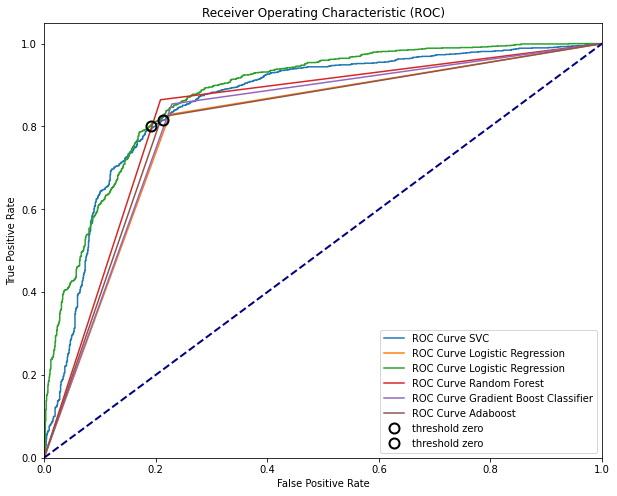

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, grid_sup.decision_function(X_test))
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg.decision_function(X_test))
fpr_grid_tree,      tpr_grid_tree,      thresholds_grid_tree = roc_curve(y_test, tree_pred)
fpr_rfm_grid,  tpr_rfm_grid,  thresholds_rfm_grid = roc_curve(y_test, rfm_pred)
fpr_gbc,  tpr_gbc,  thresholds_gbc = roc_curve(y_test, gbc_pred)
fpr_adb,  tpr_adb,  thresholds_adb = roc_curve(y_test, adb_pred)
lw=2

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_grid_tree, tpr_grid_tree, label="ROC Curve Logistic Regression")
plt.plot(fpr_logreg, tpr_logreg, label="ROC Curve Logistic Regression")
plt.plot(fpr_rfm_grid, tpr_rfm_grid, label="ROC Curve Random Forest")
plt.plot(fpr_gbc, tpr_gbc, label="ROC Curve Gradient Boost Classifier")
plt.plot(fpr_adb, tpr_adb, label="ROC Curve Adaboost")

# plt.xlabel("FPR")
# plt.ylabel("TPR (recall)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
         
plt.plot(fpr_logreg[close_zero], tpr_logreg[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()



**SELECTING THE BEST MODEL**

Based on the outcomes of the confusion Matrix and the ROC curve, the logistic model will be selected as the best model 